In [175]:
#%matplotlib ipympl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt

In [176]:
Installedfp = '.\Data\InstalledCapacity\RECAP_20220519-053554.csv'
Installed = pd.read_csv(Installedfp, encoding = "ISO-8859-1")

In [177]:
Installed = Installed[Installed.Technology == "Solar"]
Installed[years] = Installed[years].apply(pd.to_numeric, errors='coerce')
#print(Installed.shape, Installed.columns)

In [178]:
Installed.head()

,Country,Technology,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,World,Solar,1227.669,1338.986,1639.059,2353.43,3440.379,4936.519,6505.593,8985.466,...,104311.845,141168.897,180216.107,228053.643,300198.964,395275.634,488819.762,591058.562,716787.807,849472.633
2,Africa,Solar,10.927,13.029,15.243,18.019,21.996,25.965,34.268,46.656,...,410.954,731.973,1738.120,2255.761,3413.417,5236.063,8195.268,9500.319,10788.859,11387.26
4,Algeria,Solar,0.000,0,0,0,0,0,0,0,...,25.000,25.000,26.100,74.100,244.100,425.000,448.000,448.000,448,448
6,Angola,Solar,0.000,0.034,0.186,0.245,0.419,0.616,0.793,2.659,...,9.604,10.799,11.962,12.867,13.377,13.377,13.377,13.377,13.377,13.377
8,Benin,Solar,0.000,0,0,0,0,0,0,0,...,0.000,0.000,0.200,1.200,2.900,2.900,2.900,2.900,2.94,2.94


In [179]:
Popfp = '.\Data\PopAndGDP\Population.csv'
Pop = pd.read_csv(Popfp, encoding = "utf-8")
Pop[years] = Pop[years].apply(pd.to_numeric, errors='coerce')

GDPfp = '.\Data\PopAndGDP\GDPPerCapita.csv'
GDP = pd.read_csv(GDPfp, encoding = "utf-8")
GDP[years] = GDP[years].apply(pd.to_numeric, errors='coerce')

years = ["2000","2012","2013","2014","2015","2016","2017","2018","2019"]



In [180]:
dfs = []
for year in years:
    df = pd.merge(Installed[["Country",year]], GDP[["Country",year]], on=["Country"], how='inner')
    df = pd.merge(df, Pop[["Country",year]], on=["Country"], how='inner')
    df = df.drop_duplicates()
    df.rename(columns={year+'_x':"Installed", year+'_y':"GDP", year:"Pop"}, inplace=True)
    df[["Installed", "GDP", "Pop"]] = df[["Installed", "GDP", "Pop"]].apply(pd.to_numeric, errors='coerce')
    df = df.dropna(axis=0)
    df.Installed = df.Installed/df.Pop
    dfs.append(df)
    #print(year, df.shape)
    

In [181]:
Installed[Installed["Country"] == "Philippines"][years].squeeze()

2000      0.000
2012      2.020
2013      3.047
2014     27.737
2015    172.550
2016    784.145
2017    908.376
2018    916.961
2019    982.246
Name: 166, dtype: float64

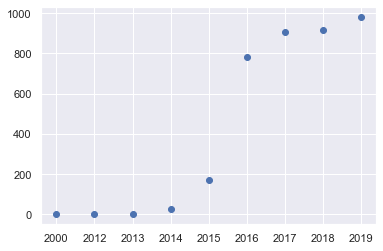

In [182]:
plt.scatter(years,np.array(Installed[Installed["Country"] == "Philippines"][years].squeeze()))

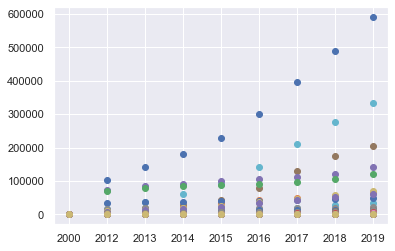

In [183]:
Installed[years] = Installed[years].apply(pd.to_numeric, errors='coerce')
for index,row in Installed.iterrows():
    #print(list(row[years]))
    #if row["Country"] in ["Philippines", "China", "United States of America"]:
    plt.scatter(years, list(row[years]))

In [184]:
# 3D Plots
'''sns.set(style = "darkgrid")
fig, ax = plt.subplots(9,1,figsize=(10,50), subplot_kw={'projection': '3d'})
for i in range(len(years)):
    ax[i].scatter(dfs[i].GDP, dfs[i].Pop, dfs[i].Installed)
    ax[i].scatter(dfs[i][dfs[i]["Country"] == "Philippines"].GDP, dfs[i][dfs[i]["Country"] == "Philippines"].Pop, dfs[i][dfs[i]["Country"] == "Philippines"].Installed, color="red")
    ax[i].set_xlabel("GDP Per Capita")
    ax[i].set_zlabel("Installed Solar Capacity Per Capita")
    ax[i].set_ylabel("Population")
'''


'sns.set(style = "darkgrid")\nfig, ax = plt.subplots(9,1,figsize=(10,50), subplot_kw={\'projection\': \'3d\'})\nfor i in range(len(years)):\n    ax[i].scatter(dfs[i].GDP, dfs[i].Pop, dfs[i].Installed)\n    ax[i].scatter(dfs[i][dfs[i]["Country"] == "Philippines"].GDP, dfs[i][dfs[i]["Country"] == "Philippines"].Pop, dfs[i][dfs[i]["Country"] == "Philippines"].Installed, color="red")\n    ax[i].set_xlabel("GDP Per Capita")\n    ax[i].set_zlabel("Installed Solar Capacity Per Capita")\n    ax[i].set_ylabel("Population")\n'

{'n_neighbors': 19}
{'n_neighbors': 19}
{'n_neighbors': 19}
{'n_neighbors': 19}
{'n_neighbors': 19}
{'n_neighbors': 19}
{'n_neighbors': 19}
{'n_neighbors': 19}
{'n_neighbors': 19}


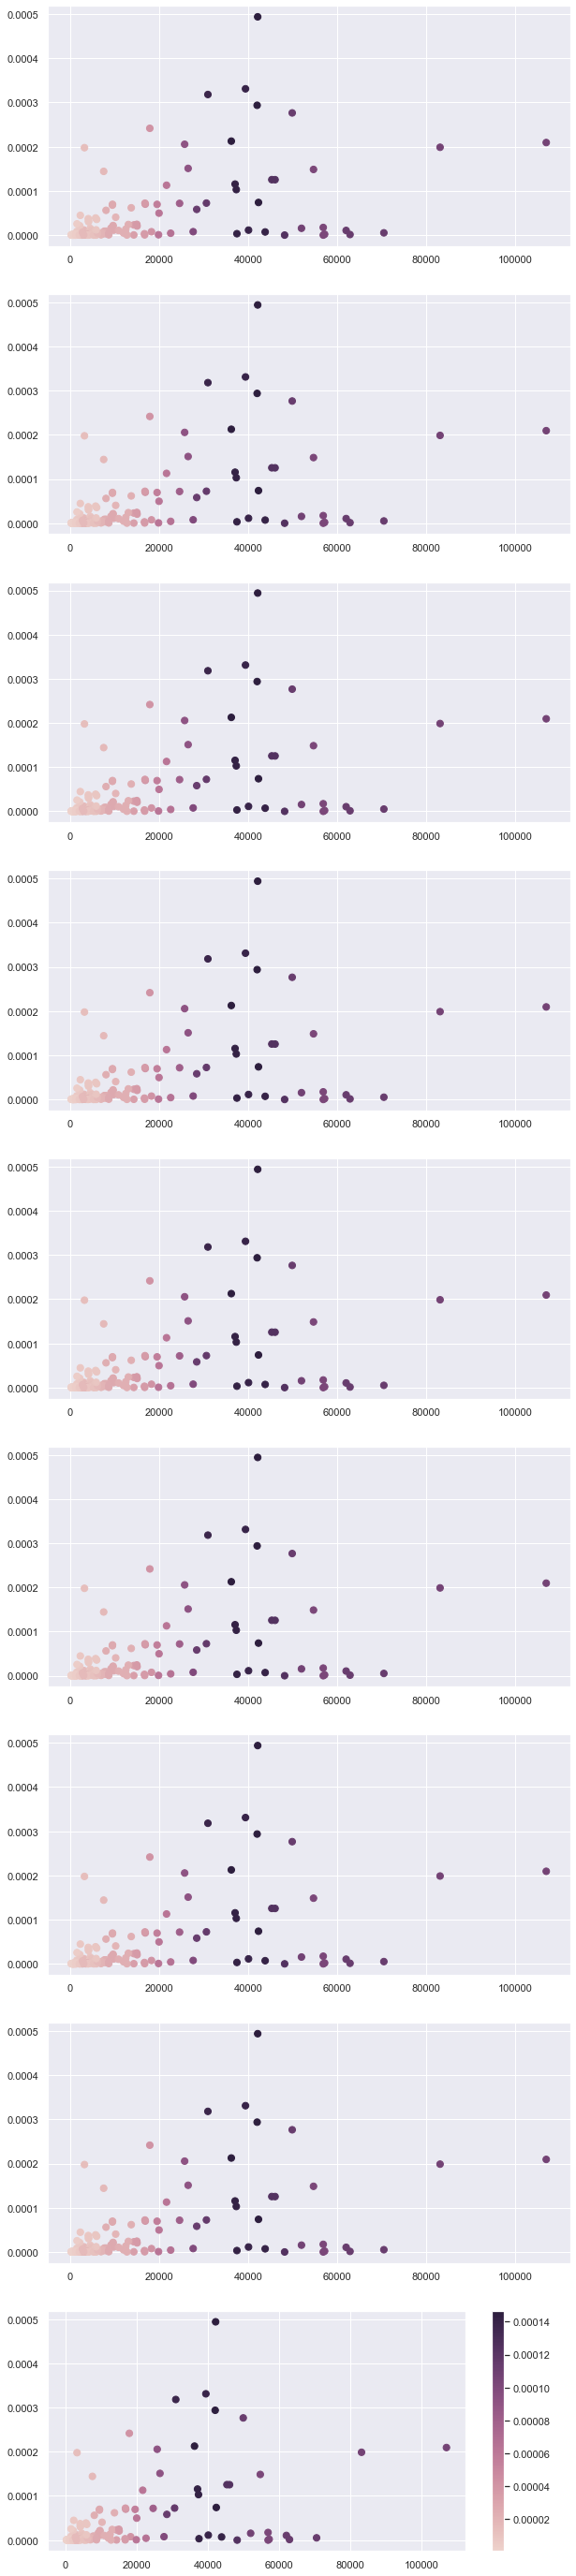

In [187]:
# 2D Plots with KNN
sns.set(style = "darkgrid")
fig, ax = plt.subplots(len(years),1,figsize=(10,50))
for i in range(len(years)):
    X = dfs[5][['GDP']]
    Y = dfs[5][['Installed']]

    parameters = {"n_neighbors": range(1,50)}
    gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
    gridsearch.fit(X, Y)
    print(gridsearch.best_params_)

    train_preds_grid = gridsearch.predict(X)
    train_mse = mean_squared_error(Y, train_preds_grid)
    train_rmse = sqrt(train_mse)

    cmap = sns.cubehelix_palette(as_cmap=True)
    points = ax[i].scatter(X, Y, c=train_preds_grid, s=50, cmap=cmap)
fig.colorbar(points)

    #ax[i].scatter(dfs[i].GDP, dfs[i].Installed)
    #ax[i].scatter(dfs[i][dfs[i]["Country"] == "Philippines"].GDP, dfs[i][dfs[i]["Country"] == "Philippines"].Installed, color="red")
    #ax[i].set_xlabel("GDP Per Capita")
    #ax[i].set_ylabel("Installed Solar Capacity Per Capita")



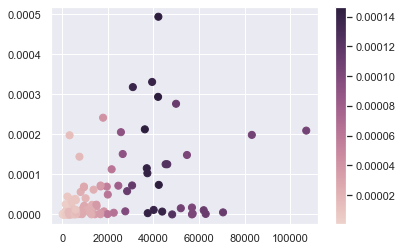

In [186]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt

#knn_model = KNeighborsRegressor(n_neighbors=2)
X = dfs[5][['GDP']]
Y = dfs[5][['Installed']]

parameters = {"n_neighbors": range(1,50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X, Y)
gridsearch.best_params_

train_preds_grid = gridsearch.predict(X)
train_mse = mean_squared_error(Y, train_preds_grid)
train_rmse = sqrt(train_mse)
train_rmse

cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X, Y, c=train_preds_grid, s=50, cmap=cmap)
f.colorbar(points)
plt.show()